In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Train = pd.read_csv(r'Train.csv')

Train

,PetalLengthCm,PetalWidthCm,Species
0,3.7,1.0,Iris-versicolor
1,5.1,1.5,Iris-virginica
2,5.5,1.8,Iris-virginica
3,4.4,1.4,Iris-versicolor
4,6.1,2.5,Iris-virginica
...,...,...,...
100,4.0,1.3,Iris-versicolor
101,4.5,1.7,Iris-virginica
102,1.2,0.2,Iris-setosa
103,4.0,1.2,Iris-versicolor


In [2]:
X = Train[['PetalLengthCm', 'PetalWidthCm']].to_numpy()
X_tilda = np.concatenate((X.reshape(105,2), np.ones((105,1))), axis=1)

X_tilda

array([[3.7, 1. , 1. ],
       [5.1, 1.5, 1. ],
       [5.5, 1.8, 1. ],
       [4.4, 1.4, 1. ],
       [6.1, 2.5, 1. ],
       [4.2, 1.3, 1. ],
       [6.6, 2.1, 1. ],
       [4.5, 1.5, 1. ],
       [1.4, 0.2, 1. ],
       [6.7, 2. , 1. ],
       [4.1, 1. , 1. ],
       [1.4, 0.2, 1. ],
       [1.3, 0.3, 1. ],
       [1.9, 0.4, 1. ],
       [3.5, 1. , 1. ],
       [4.9, 1.8, 1. ],
       [1.9, 0.2, 1. ],
       [1.6, 0.2, 1. ],
       [1.7, 0.5, 1. ],
       [4.2, 1.3, 1. ],
       [1.5, 0.2, 1. ],
       [4.2, 1.2, 1. ],
       [6.7, 2.2, 1. ],
       [1.4, 0.2, 1. ],
       [4.3, 1.3, 1. ],
       [5. , 2. , 1. ],
       [1.4, 0.2, 1. ],
       [4.8, 1.8, 1. ],
       [5.1, 1.9, 1. ],
       [4. , 1. , 1. ],
       [4.5, 1.5, 1. ],
       [5.4, 2.3, 1. ],
       [4. , 1.3, 1. ],
       [1.7, 0.4, 1. ],
       [3.3, 1. , 1. ],
       [5.3, 1.9, 1. ],
       [1.4, 0.2, 1. ],
       [1.2, 0.2, 1. ],
       [3.8, 1.1, 1. ],
       [5. , 1.7, 1. ],
       [1.5, 0.1, 1. ],
       [5.1, 2.4

In [3]:
Species = Train[['Species']].to_numpy()
Targets = np.array([])
for c in Species:
    if c == 'Iris-setosa':
        class_array = [1, 0, 0]
    elif c == 'Iris-versicolor':
        class_array = [0, 1, 0]
    elif c == 'Iris-virginica':
        class_array = [0, 0, 1]
    Targets = np.concatenate((Targets, class_array), axis=0)
Targets = Targets.reshape((105,3))

Targets

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [4]:
w = np.linalg.inv(X_tilda.T @ X_tilda) @ X_tilda.T @ Targets

w

array([[-0.25035195,  0.28539678, -0.03504482],
       [ 0.01970888, -0.59028535,  0.57057647],
       [ 1.24005633, -0.0216828 , -0.21837353]])

In [5]:
Test = pd.read_csv(r'Test.csv')

Test

,PetalLengthCm,PetalWidthCm,Species
0,4.7,1.2,Iris-versicolor
1,1.7,0.3,Iris-setosa
2,6.9,2.3,Iris-virginica
3,4.5,1.5,Iris-versicolor
4,4.8,1.4,Iris-versicolor
5,1.5,0.4,Iris-setosa
6,3.6,1.3,Iris-versicolor
7,5.1,2.3,Iris-virginica
8,4.5,1.5,Iris-versicolor
9,3.9,1.2,Iris-versicolor


In [6]:
X_test = Test[['PetalLengthCm', 'PetalWidthCm']].to_numpy()
X_tilda_test = np.concatenate((X_test.reshape(45,2), np.ones((45,1))), axis=1)

X_tilda_test

array([[4.7, 1.2, 1. ],
       [1.7, 0.3, 1. ],
       [6.9, 2.3, 1. ],
       [4.5, 1.5, 1. ],
       [4.8, 1.4, 1. ],
       [1.5, 0.4, 1. ],
       [3.6, 1.3, 1. ],
       [5.1, 2.3, 1. ],
       [4.5, 1.5, 1. ],
       [3.9, 1.2, 1. ],
       [5.1, 2. , 1. ],
       [1.4, 0.1, 1. ],
       [1.3, 0.2, 1. ],
       [1.5, 0.1, 1. ],
       [1.5, 0.3, 1. ],
       [4.7, 1.6, 1. ],
       [5.8, 2.2, 1. ],
       [3.9, 1.1, 1. ],
       [4.5, 1.3, 1. ],
       [5.6, 2.2, 1. ],
       [1.6, 0.2, 1. ],
       [4.9, 1.8, 1. ],
       [1.6, 0.4, 1. ],
       [5.6, 2.1, 1. ],
       [6.4, 2. , 1. ],
       [5.2, 2.3, 1. ],
       [5.8, 1.8, 1. ],
       [5.9, 2.3, 1. ],
       [1.4, 0.3, 1. ],
       [1.6, 0.2, 1. ],
       [1. , 0.2, 1. ],
       [1.5, 0.4, 1. ],
       [4.4, 1.4, 1. ],
       [1.6, 0.2, 1. ],
       [1.3, 0.2, 1. ],
       [5. , 1.9, 1. ],
       [4.5, 1.5, 1. ],
       [1.5, 0.2, 1. ],
       [1.4, 0.2, 1. ],
       [1.5, 0.1, 1. ],
       [5.1, 1.9, 1. ],
       [4.5, 1.6

In [7]:
Predictions = np.array([])
for test_data in X_test:
    y1 = w[:2,0].T.dot(test_data) + w[2:,0]
    y2 = w[:2,1].T.dot(test_data) + w[2:,1]
    y3 = w[:2,2].T.dot(test_data) + w[2:,2]
    if ((y1 > y2) and (y1 > y3)):
        Predictions = np.append(Predictions, [0])
    elif ((y2 > y1) and (y2 > y3)):
        Predictions = np.append(Predictions, [1])
    elif ((y3 > y1) and (y3 > y2)):
        Predictions = np.append(Predictions, [2])

Predictions

array([1., 0., 2., 2., 1., 0., 2., 2., 2., 1., 2., 0., 0., 0., 0., 2., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 2., 0.,
       0., 2., 2., 0., 0., 0., 2., 2., 2., 0., 0.])

In [8]:
Species_test = Test[['Species']].to_numpy()
Y = np.array([])
for c in Species_test:
    if c == 'Iris-setosa':
        Y = np.append(Y, [0])
    elif c == 'Iris-versicolor':
        Y = np.append(Y, [1])
    elif c == 'Iris-virginica':
        Y = np.append(Y, [2])
Y

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0.])

In [9]:
correct=0
for i in range(45):
    if Predictions[i]==Y[i]:
        correct+=1
accuracy = (correct / 45) * 100
print(f"The classification accuracy is = {accuracy} %")

The classification accuracy is = 82.22222222222221 %


In [10]:
correct=[0,0,0]
incorrect=[[0,0,0],[0,0,0],[0,0,0]]
for i in range(45):
    if (Y[i]==0):
        if Y[i]==Predictions[i]:
            correct[0]+=1
        elif Predictions[i]==1:
            incorrect[1][0]+=1
        else:
            incorrect[2][0]+=1
    elif (Y[i]==[1]):
        if Y[i]==Predictions[i]:
            correct[1]+=1
        elif Predictions[i]==0:
            incorrect[0][1]+=1
        else:
            incorrect[2][1]+=1
    elif (Y[i]==[2]):
        if Y[i]==Predictions[i]:
            correct[2]+=1
        elif Predictions[i]==0:
            incorrect[0][2]+=1
        else:
            incorrect[1][2]+=1 

cm = incorrect
cm[0][0] = correct[0]
cm[1][1] = correct[1]
cm[2][2] = correct[2]

cm = np.array(cm)

cm

array([[19,  0,  0],
       [ 0,  5,  0],
       [ 0,  8, 13]])

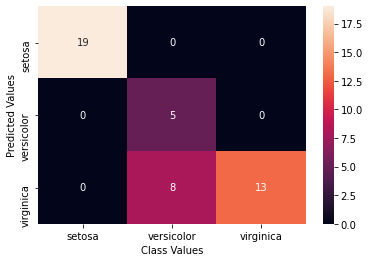

In [11]:
cm = pd.DataFrame(cm, index = ['setosa','versicolor','virginica'], columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm, annot=True)
plt.xlabel('Class Values')
plt.ylabel('Predicted Values')

plt.show()
#plt.savefig('Confusion.jpg')